# 1 - Introduction

Name : Wenny Chandra Sari

Batch : 15 RMT

Dataset Overview : The dataset contains a total of 2148 images which are 1232 pictures of Kirmizi pistachios and 916 pictures of Siirt pistachios. The pictures were taked using GT2000C camera, a lightning box, a sepecial black background surface to prevent shadow, then they were repeated using a computer vision system to get repeatedly pictures at low cost. Link to [list of dataset](https://www.muratkoklu.com/datasets/), [dataset 28MB](https://www.kaggle.com/datasets/muratkokludataset/pistachio-image-dataset) and [dataset 2MB](https://www.kaggle.com/datasets/muratkokludataset/pistachio-dataset)


Objective : Make a CNN model to classify Kirmizi pistachio and Siirt pistachio based on their images to cut the post-haverst-selection-cost.

# 2 - Import Libraries

Di bagian ini saya melakukan instalasi dan pengimporan library.

In [ ]:
pip install colorthief

Colorthief berguna untuk ____

In [ ]:
pip install tensorflow==2.11.0

In [ ]:
pip install streamlit==1.12.2

In [ ]:
!pip install numpy==1.22.4

In [ ]:
pip install split-folders

Library split-folder akan saya gunakan untuk ___

In [ ]:
pip install pathlib

Libary pathlib akan saya gunakan untuk ___

In [ ]:
# Akses folder
import os       # digunakan untuk
import glob     # digunakan untuk

# Data load dan operasi matematika
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 # computer Vision

# Data Modeling Neural Network
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2S
from keras import Model

# Preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator # digunakan untuk augmentasi image

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Dropout, Flatten, Input, BatchNormalization

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# apa guna library ini?
import splitfolders
import pathlib

# 3- Data Loading

Dibagian ini saya melakukan pemgambilan dataset gambar dan pembagian dataset ke subset train, validasi, test. Dataset awal terdiri atas 1232 kirmizi dan 916 siirt. Train set terdiri dari 985 kirmizi dan 732 siirt. Test set terdiri dari 124 kirmizi dan 93 siirt. Val set terdiri dari 123 kirmizi dan 91 siirt. 

In [ ]:
!mkdir -p ~/.kaggle #bikin folder di kaggle root
!cp kaggle.json ~/.kaggle # copy paster kaggle.json ke folder kaggle 

!mkdir ./kaggle #bikin folder kaggle di lokasi sama (bukan di root)
!mv ./kaggle.json ./kaggle #move atau pindahi file kaggle.json ke folder kaggle

___ Koding di atas adalah Linux Syntax untuk membuat folder di kaggle root, copy-paste kagle.json ke folder kaggle, membuat folder kaggle di lokasi yang sama (bukan diroot), memindahkan file kaggle.json ke folder kaggle.

__ kaggle.json adalah

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json #perizinan akses, hanya pemilik file yang memiliki akses baca dan tulis ke file
!ls ~/.kaggle #cek list data yang ada di folder kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d muratkokludataset/pistachio-image-dataset

 34% 9.00M/26.7M [00:00<00:00, 90.7MB/s]
100% 26.7M/26.7M [00:00<00:00, 153MB/s] 


In [ ]:
!unzip -q /content/pistachio-image-dataset.zip -d images

___ Koding di atas adalah Linux Syntax untuk membuat perizinan akses hanya pemilik file yang memiliki akses baca dan tulis ke file yang memiliki akses baca dan tulis ke file, cek daftar data yang ada di folder kaggle, download dataset dari API kaggle, unzip dataset ke dalam folder images.

In [ ]:
# Checking Folder
os.listdir('/content/images/Pistachio_Image_Dataset/Pistachio_Image_Dataset')

['Pistachio_Image_Dataset_Request.txt', 'Siirt_Pistachio', 'Kirmizi_Pistachio']

In [ ]:
base = '/content/images/Pistachio_Image_Dataset/Pistachio_Image_Dataset'
base = pathlib.Path(base)
splitfolders.ratio(base, output='imgs', seed=123, ratio=(.8,.1,.1), group_prefix=None)

Copying files: 2148 files [00:00, 3130.13 files/s]


- __ os.listdir(parameter) adalah untuk
- __ pathlib.Path(parameter) adalah untuk
- __ splitfolder.ratio(parameter) adalah untuk

In [ ]:
main_path = '/content/imgs/'
main_path

'/content/imgs/'

In [ ]:
train_dir = os.path.join(main_path, 'train')
test_dir = os.path.join(main_path, 'test')
val_dir = os.path.join(main_path, 'val')

- __os.path.join(parameter) adalah untuk

In [ ]:
# Checking Data train

print('train set:')
train_kirmizi = len(os.listdir(os.path.join(train_dir, 'Kirmizi_Pistachio')))
train_siirt = len(os.listdir(os.path.join(train_dir, 'Siirt_Pistachio')))
print(f'jumlah kirmizi= {train_kirmizi}')
print(f'jumlah siirt = {train_siirt}')

train set:
jumlah kirmizi= 985
jumlah siirt = 732


- __ len adalah untuk
- __ os.listdir adalah untuk
- __ os.path.join(parameter) adalah untuk ... Dia bekerja dengan cara
- __ print adalah untuk... f'text {variable}' adalah untuk

In [ ]:
# Checking Data test

print('test set:')
test_kirmizi = len(os.listdir(os.path.join(test_dir, 'Kirmizi_Pistachio')))
test_siirt = len(os.listdir(os.path.join(test_dir, 'Siirt_Pistachio')))
print(f'jumlah kirmizi= {test_kirmizi}')
print(f'jumlah siirt = {test_siirt}')

test set:
jumlah kirmizi= 124
jumlah siirt = 93


In [ ]:
# Checking Data val

print('val set:')
val_kirmizi = len(os.listdir(os.path.join(val_dir, 'Kirmizi_Pistachio')))
val_siirt = len(os.listdir(os.path.join(val_dir, 'Siirt_Pistachio')))
print(f'jumlah kirmizi= {val_kirmizi}')
print(f'jumlah siirt = {val_siirt}')

val set:
jumlah kirmizi= 123
jumlah siirt = 91


Train set terdiri dari 985 kirmizi dan 732 siirt. Test set terdiri dari 124 kirmizi dan 93 siirt. Val set terdiri dari 123 kirmizi dan 91 siirt. 

In [ ]:
train_kirmizi = glob.glob(train_dir+"/Kirmizi_Pistachio/*.jpg")
train_siirt = glob.glob(train_dir+"/Siirt_Pistachio/*.jpg")

test_kirmizi = glob.glob(test_dir+"/Kirmizi_Pistachio/*.jpg")
test_siirt = glob.glob(test_dir+"/Siirt_Pistachio/*.jpg")

val_kirmizi = glob.glob(val_dir+"/Kirmizi_Pistachio/*.jpg")
val_siirt = glob.glob(val_dir+"/Siirt_Pistachio/*.jpg")

__ glob.glob() adalah untuk 

# 4 - EDA

Dibagian ini saya memisahkan gambar untuk uji (inference set) dari data test dan melakukan visualisasi. 

Saya mengambil bbrp data sehingga data test berubah menjadi 115 kirmizi dan 86 siirt dan inference set menjadi dari 9 kirmizi dan 7 siirt.

Berdasarkan visualisasi terlihat bahwa jumlah data kirmizi pistachio dan siirt pistachio pada train set cukup berimbang. Model yang dibuat dapat bekerja dengan baik.

In [ ]:
# membuat fungsi dataframe

def create_dataframe(list_of_images):
    data = []
    for image in list_of_images:
        ##ambil nama dari file \ ke -1
        # images.append(image.split('\')[-1]) 
        # label.append(image.split('\')[-2])
        data.append((image, image.split('/')[-2]))
    return pd.DataFrame(data, columns=['images', 'label'])

train_df = create_dataframe(train_kirmizi + train_siirt)
train_df = train_df.sample(frac=1, random_state=1).reset_index(drop=True)

test_df = create_dataframe(test_kirmizi + test_siirt)
test_df = test_df.sample(frac=1, random_state=1).reset_index(drop=True)

val_df = create_dataframe(val_kirmizi + val_siirt)
val_df = val_df.sample(frac=1, random_state=1).reset_index(drop=True)

Mengubah train_kirmizi dan train_siirt menjadi train df dan seterusnya menjadi test_df dan val_df. Frac digunakan untuk ___

In [ ]:
# mengambil 7 % dari data test untuk dijadikan inference

test_df, inf_df = train_test_split(test_df, test_size=0.07, random_state=1, stratify = test_df['label'])
print(test_df.shape)
print(inf_df.shape)

(201, 2)
(16, 2)


16 dari data test diubah menjadi data inference.

In [ ]:
# print pembagian 5 data terawal trainset
print(train_df.shape)
train_df.head()

(1717, 2)


,images,label
0,/content/imgs/train/Kirmizi_Pistachio/kirmizi ...,Kirmizi_Pistachio
1,/content/imgs/train/Kirmizi_Pistachio/kirmizi ...,Kirmizi_Pistachio
2,/content/imgs/train/Kirmizi_Pistachio/kirmizi ...,Kirmizi_Pistachio
3,/content/imgs/train/Siirt_Pistachio/siirt 675.jpg,Siirt_Pistachio
4,/content/imgs/train/Kirmizi_Pistachio/kirmizi ...,Kirmizi_Pistachio


In [ ]:
# print pembagian 5 data terawal valset
print(val_df.shape)
val_df.head()

(214, 2)


,images,label
0,/content/imgs/val/Kirmizi_Pistachio/kirmizi 84...,Kirmizi_Pistachio
1,/content/imgs/val/Siirt_Pistachio/siirt 402.jpg,Siirt_Pistachio
2,/content/imgs/val/Kirmizi_Pistachio/kirmizi 97...,Kirmizi_Pistachio
3,/content/imgs/val/Kirmizi_Pistachio/kirmizi 53...,Kirmizi_Pistachio
4,/content/imgs/val/Kirmizi_Pistachio/kirmizi 51...,Kirmizi_Pistachio


In [ ]:
# print pembagian 5 data terawal testset
print(test_df.shape)
test_df.head()

(201, 2)


,images,label
153,/content/imgs/test/Siirt_Pistachio/siirt 170.jpg,Siirt_Pistachio
120,/content/imgs/test/Siirt_Pistachio/siirt (29).jpg,Siirt_Pistachio
99,/content/imgs/test/Siirt_Pistachio/siirt 810.jpg,Siirt_Pistachio
57,/content/imgs/test/Siirt_Pistachio/siirt 535.jpg,Siirt_Pistachio
160,/content/imgs/test/Kirmizi_Pistachio/kirmizi 1...,Kirmizi_Pistachio


In [ ]:
# print pembagian 5 data terawal infset
print(inf_df.shape)
inf_df

(16, 2)


,images,label
132,/content/imgs/test/Kirmizi_Pistachio/kirmizi 1...,Kirmizi_Pistachio
66,/content/imgs/test/Siirt_Pistachio/siirt 322.jpg,Siirt_Pistachio
179,/content/imgs/test/Siirt_Pistachio/siirt 244.jpg,Siirt_Pistachio
126,/content/imgs/test/Kirmizi_Pistachio/kirmizi 5...,Kirmizi_Pistachio
17,/content/imgs/test/Kirmizi_Pistachio/kirmizi 1...,Kirmizi_Pistachio
69,/content/imgs/test/Siirt_Pistachio/siirt 65.jpg,Siirt_Pistachio
136,/content/imgs/test/Kirmizi_Pistachio/kirmizi 1...,Kirmizi_Pistachio
10,/content/imgs/test/Kirmizi_Pistachio/kirmizi 1...,Kirmizi_Pistachio
22,/content/imgs/test/Siirt_Pistachio/siirt 669.jpg,Siirt_Pistachio
198,/content/imgs/test/Siirt_Pistachio/siirt 153.jpg,Siirt_Pistachio


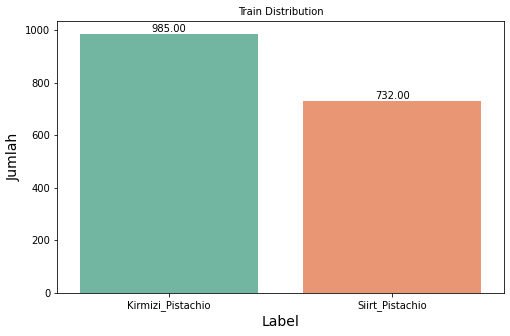

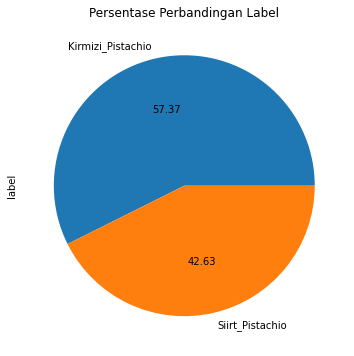

In [ ]:
# membuat fungsi countplot untuk visualisasi data

def visualize_data(dataframe, label):
    fig, ax = plt.subplots(figsize =(8, 5))
    ax = sns.countplot(x='label', data=dataframe, palette='Set2')
    ax.set_title('Data Distribution')
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
    
    # Setting the label for x-axis
    plt.xlabel("Label", size=14)
    # Setting the label for y-axis
    plt.ylabel("Jumlah", size=14)
    # plt title base on name of 
    plt.title(f"{label} Distribution", size=10)
    plt.show()

# memvisualisasi data train
visualize_data(train_df, 'Train')

# visualisasi pie chart dari label
train_df['label'].value_counts().plot(kind='pie', figsize=(6,6), autopct='%.2f')
plt.title('Persentase Perbandingan Label')
plt.show()

Berdasarkan visualisasi terlihat bahwa jumlah data kirmizi pistachio dan siirt pistachio pada train set cukup berimbang yaitu 985 dan 732 atau 53.7% dan 42.63%. Persebaran data tergolong seimbang.

Model yang dibuat dapat bekerja dengan baik.

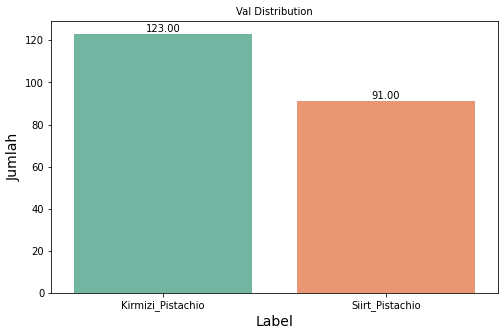

In [ ]:
visualize_data(val_df, 'Val')

Persebaran val set adalah 123 kirmizi pistachio dan 91 siirt pistachio.

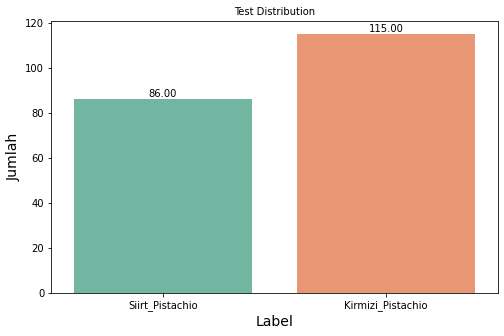

In [ ]:
visualize_data(test_df, 'Test')

Persebaran test set adalah 115 kirmizi pistachio dan 86 siirt pistachio.

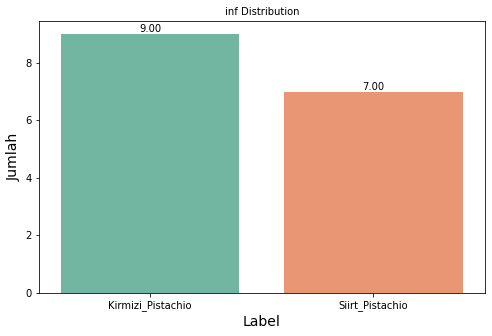

In [ ]:
visualize_data(inf_df, 'inf')

Persebaran inference set adalah 9 kirmizi pistachio dan 7 siirt pistachio.

__ coba jabarkan fungsi visualisasi

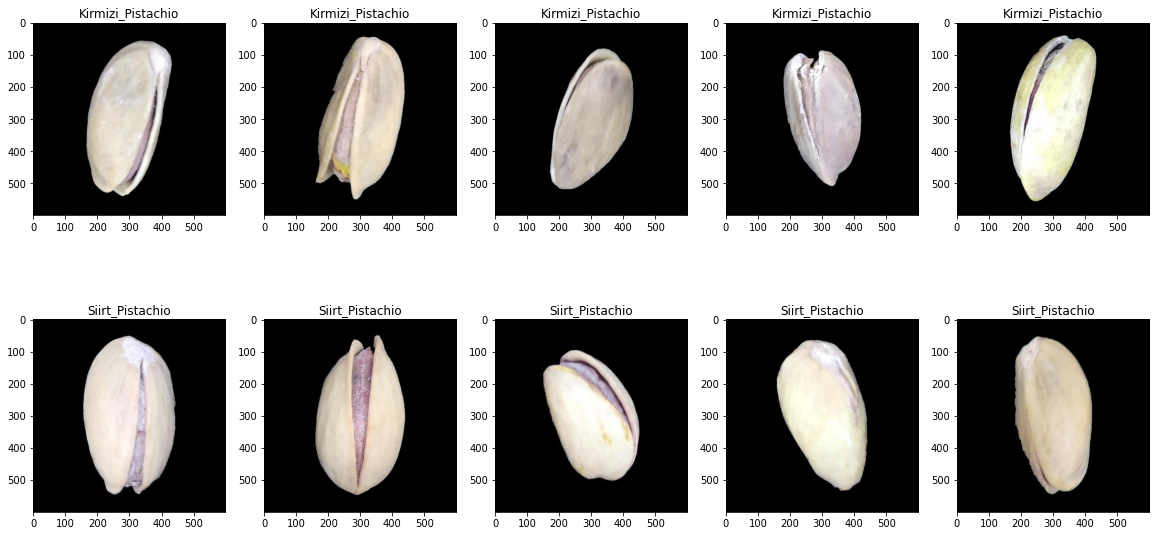

In [ ]:
# melihat sampel gambar dari dataset
Kirmizi_Pistachio_samples = (train_df[train_df['label']=='Kirmizi_Pistachio']['images'].iloc[:5]).tolist()
Siirt_Pistachio_samples = (train_df[train_df['label']=='Siirt_Pistachio']['images'].iloc[:5]).tolist()

# visualize sample images
def visualize_samples(samples):
    fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
    for i, sample in enumerate(samples):
        img = cv2.imread(sample)
        ax[i//5, i%5].set_title(sample.split('/')[-2])                  # ax?
        ax[i//5, i%5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

visualize_samples(Kirmizi_Pistachio_samples + Siirt_Pistachio_samples)

# 5 - Data Preprocessing & Augmentasi Data

## 5.1 - Split Fitur dan Target

In [ ]:
# fitur                             # ?
X = 'images'
# target
y= 'label'

## 5.2 - Split Data Train, Data Test, Data Val, dan Data Inference

Data telah dipisah sejak data loading, sehingga disini hanya akan mengecek ulang size data.

In [ ]:
# Menampilkan ukuran dataset
print('Size train: ', train_df.shape)
print('Size validation: ', val_df.shape)
print('Size test: ', test_df.shape)
print('Size inference: ', inf_df.shape)

Size train:  (1717, 2)
Size validation:  (214, 2)
Size test:  (201, 2)
Size inference:  (16, 2)


## 5.3 - Augmentasi

Augmentasi merupakan suatu teknik untuk memperluas atau memperbesar data sehingga model dapat melakukan generalisasi.Pada bagian augmentasi saya melakukan rescale, rotasi, pergeseran gambar secara horizontal dan vertikal, memperbesar dan memperkecil, dan membalikan gambar.  Hal ini dilakukan untuk mencegah adannya overfitting dan model mengenali pola yang bermacam-macam. 

Saya menentukan beberapa setting dasar yang akan digunakan dibagian lain dari notebook, seperti ukuran image, kerandoman atau seed, jumlah batch, dan inputs.


In [ ]:
# Menentukan bbrp setting

img_height= 200
img_width= 200
SEED = 1
BATCH = 128
inputs= [img_height,img_width,3]

In [ ]:
# Augmentasi data 
# Lakukan augmentasi hanya pada train
train_datagen = ImageDataGenerator(
              rescale= 1./255, #normalisasi/rescale 0-1
              rotation_range= 0.1, #rotasi
              width_shift_range= 0.2, #menggeser image pada sumbu X (horizontal)
              shear_range= 0.2, #mereganggkan image (bisa vertikal atau horizontal)
              zoom_range= 0.2, #memperbesar
              horizontal_flip= True #pencerminan
              )

# Untuk data validation hanya dilakukan rescale
val_datagen = ImageDataGenerator(rescale=1./255)

# Untuk data validation hanya dilakukan rescale
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# data train
ds_train = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width), #agar size target sama
    class_mode='binary',
    batch_size=BATCH,
    shuffle=True, #shuffle hanya di data train
    seed=SEED)

# data val
ds_val = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='binary',
    batch_size=BATCH,
    shuffle=False,
    seed=SEED)

# data test
ds_test = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='binary',
    batch_size=BATCH,
    shuffle=False,
    seed=SEED)

Found 1717 validated image filenames belonging to 2 classes.
Found 214 validated image filenames belonging to 2 classes.
Found 201 validated image filenames belonging to 2 classes.


__ train_datagen.flow_from_dataframe() berguna untuk

In [ ]:
#cek label dari class
ds_train.class_indices

{'Kirmizi_Pistachio': 0, 'Siirt_Pistachio': 1}

- label 0 digunakan untuk mempresentasikan 'Kirmizi_Pistachio'
- label 1 digunakan untuk mempresentasikan 'Siirt_Pistachio'

class_indices berguna untuk

# 6 - Modeling

Dibagian ini saya melakukan pendefinisian callbacks, pendefinisian model, dan fitting.

In [ ]:
callbacks1 = [
    EarlyStopping(monitor='val_loss', patience = 3),
    ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only=True)
    #ReduceLRonPlateau
]

callbacks ..penjelasan..

In [ ]:
#arsitektur model
model_pistachio= Sequential()

#Layer Conv 1, bisa coba atur kernel_initializer dan activation
model_pistachio.add(Conv2D(filters=16, kernel_size=3, activation='relu',
                       input_shape=inputs))
model_pistachio.add(MaxPooling2D(pool_size=2, strides=2))

#Layer Conv 2
model_pistachio.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding= 'same'))
model_pistachio.add(MaxPooling2D(pool_size=2, strides=2))

#Flatten
model_pistachio.add(Flatten())

#Hidden Layer
model_pistachio.add(Dense(units=64, activation='relu'))

#Output Layer
model_pistachio.add(Dense(units=1, activation='sigmoid'))

#Summary
model_pistachio.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 99, 99, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 76832)             0         
                                                                 
 dense (Dense)               (None, 64)                4

Terminologi:
- Convolution layer merupakan perkalian antara matriks yaitu input dan dan nilai dari filter. 
- Flatten layer digunakan untuk membentuk ulang feature maps menjadi sebuah vektor, outputnya nanti akan dimasukkan dalam hidden layer.

Pengaturan model:
1. Model menggunakan 2 convolution layer. Conv-1 menggunakan 16 filter, ukuran filter 3x3, fungsi aktivasi relu, padding sama dengan ukuran input. Kemudian conv-1 di Maxpooling dengan pool_size 2 dan strides 2.
2. Conv-2 menggunakan 32 filter, ukuran filter 3x3, fungsi aktivasi relu, padding sama dengan ukuran layer sebelumnya. Kemudian layer di Maxpooling dengan pool_size 2 dan strides 2.
3. Model kemudian di flatten menjadi array 1 d supaya bisa diproses menggunakan Neural Network.
4. Model menggunakan 1 full connected hidden layer dengan neuron 64, fungsi aktivasi relu.
5. Output berupa 1 kelas.
6. Total trainable params: 4,922,465


In [ ]:
model_pistachio.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

- ___menggunakan optimizer adam, loss binary_crossentropy, dan metrics accuracy

In [ ]:
history= model_pistachio.fit(ds_train, batch_size= BATCH, 
                           epochs= 10, validation_data= ds_val,
                           callbacks= callbacks1)

Epoch 1/10
14/14 [==============================] - 78s 5s/step - loss: 0.9918 - accuracy: 0.5661 - val_loss: 0.5998 - val_accuracy: 0.6262
Epoch 2/10
14/14 [==============================] - 93s 6s/step - loss: 0.6230 - accuracy: 0.6715 - val_loss: 0.5314 - val_accuracy: 0.8224
Epoch 3/10
14/14 [==============================] - 75s 5s/step - loss: 0.5752 - accuracy: 0.7012 - val_loss: 0.4550 - val_accuracy: 0.7991
Epoch 4/10
14/14 [==============================] - 81s 6s/step - loss: 0.5683 - accuracy: 0.7006 - val_loss: 0.4872 - val_accuracy: 0.7897
Epoch 5/10
14/14 [==============================] - 70s 5s/step - loss: 0.5661 - accuracy: 0.6942 - val_loss: 0.4732 - val_accuracy: 0.7991
Epoch 6/10
14/14 [==============================] - 73s 5s/step - loss: 0.5671 - accuracy: 0.6855 - val_loss: 0.4952 - val_accuracy: 0.8131


Model menggunakan 10 epoch, callbacks1, dan batch_size 128.

In [ ]:
model_pistachio.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 99, 99, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 76832)             0         
                                                                 
 dense (Dense)               (None, 64)                4

Model menggunakan 4,922,465 params.

# 7 - Evaluasi

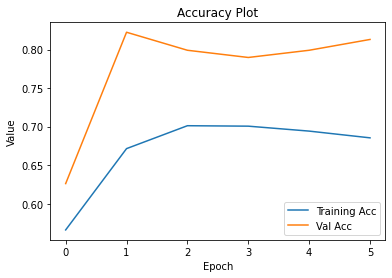

In [ ]:
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Plot')
plt.ylabel('Value') 
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

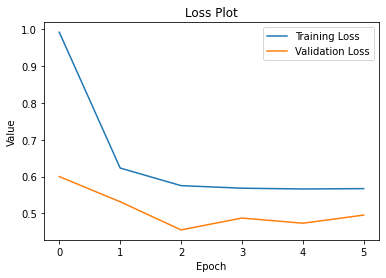

In [ ]:
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [ ]:
test_results = model_pistachio.evaluate(ds_test, verbose=0)
print(f'Test Loss     : {test_results[0]:.4f}')
print(f'Test Accuracy : {test_results[1]:.4f}')

Test Loss     : 0.5097
Test Accuracy : 0.7811


In [ ]:
y_pred = model_pistachio.predict(ds_test)
y_pred_final = []

for i in y_pred:
  if i > 0.5:
    i = 1
    y_pred_final.append(i)
  else:
    i = 0
    y_pred_final.append(i)


print(classification_report(ds_test.classes, y_pred_final))

2/2 [==============================] - 3s 634ms/step
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       115
           1       0.82      0.63      0.71        86

    accuracy                           0.78       201
   macro avg       0.79      0.76      0.77       201
weighted avg       0.79      0.78      0.78       201



Confusion Matrix


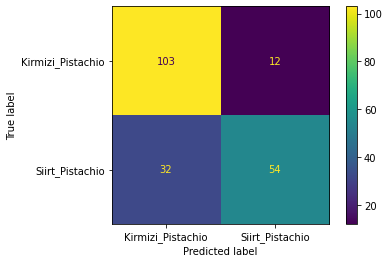

In [ ]:
#confusion matrix for test dataset
print('Confusion Matrix')
confmat = confusion_matrix(ds_test.classes, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=['Kirmizi_Pistachio', 'Siirt_Pistachio'])
disp.plot()
plt.show()

Setelah dievaluasi didapatkan hasil sesuai dengan tabel. Kita akan mencoba melakukan improvement dengan menggunakan transfer learning dan melihat hasil evaluasi.

# 8 - Model Improvement

In [ ]:
# transfer learning

# pemanggilan pretrained model
pretrained_model = EfficientNetV2S(include_top = False, weights = 'imagenet', input_shape=inputs)

82420632/82420632 [==============================] - 1s 0us/step


In [ ]:
pretrained_model.trainable = False

In [ ]:
# melihat summary pretrained model yang telah diubah paramsnya menjadi False
pretrained_model.summary()

Model: "efficientnetv2-s"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 200, 200, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 100, 100, 24  648         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

In [ ]:
# penambahan 3 hidden layer, output layer, dan penggabungan menjadi 1 model fungsional berdasarkan transfer learning.

from keras.layers import BatchNormalization
from keras import Model

input_new = pretrained_model.input
m = pretrained_model.output

m = Flatten()(m)
m = Dense(64, activation = 'relu')(m)
m = BatchNormalization()(m)
m = Dropout(0.3)(m)
m = Dense(32, activation ='relu')(m)
m = Dropout(0.3)(m)
m = Dense(16, activation = 'relu')(m)

predictions = Dense(1, activation ='sigmoid')(m)

model_new = Model(inputs = pretrained_model.input, outputs = predictions)
model_new.summary() 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 200, 200, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 100, 100, 24  648         ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
from keras.optimizers import adam_v2

In [ ]:
# penggunaan optimizer
optimizer =  adam_v2.Adam(0.0003, beta_1= 0.9, beta_2 = 0.999, amsgrad = True)

Model diimprovement menggunakan pretrained model EfficientNetV25 dengan memotong layer output dan mengubah semua layer dari model pretrained menjadi untrainable, model diflatten, kemudian ditambahkan 3 hidden layer dengan neuron 64, 32, dan 16, dan fungsi aktivasi hidden layer relu. Model menghasilkan output 1 kelas, aktivasi sigmoid. 

Kemudian model dicompile menggunakan optimizer adam_v2, loss binary_crossentropy, dan metrik evaluasi accuracy.

In [ ]:
# kompilasi model
model_new.compile(optimizer=optimizer, loss ='binary_crossentropy', metrics =['accuracy'])

In [ ]:
# fit model
history_new = model_new.fit(ds_train, batch_size = BATCH,
                        epochs = 10, validation_data = ds_val,
                        callbacks = callbacks1)

Epoch 1/10
14/14 [==============================] - 352s 24s/step - loss: 0.6810 - accuracy: 0.5812 - val_loss: 0.8211 - val_accuracy: 0.4393
Epoch 2/10
14/14 [==============================] - 299s 21s/step - loss: 0.6400 - accuracy: 0.6506 - val_loss: 0.6661 - val_accuracy: 0.4953
Epoch 3/10
14/14 [==============================] - 292s 21s/step - loss: 0.6212 - accuracy: 0.6738 - val_loss: 0.6503 - val_accuracy: 0.5000
Epoch 4/10
14/14 [==============================] - 295s 21s/step - loss: 0.6025 - accuracy: 0.6925 - val_loss: 1.6936 - val_accuracy: 0.4252
Epoch 5/10
14/14 [==============================] - 289s 22s/step - loss: 0.5955 - accuracy: 0.7059 - val_loss: 1.3856 - val_accuracy: 0.4252
Epoch 6/10
14/14 [==============================] - 289s 21s/step - loss: 0.5912 - accuracy: 0.6971 - val_loss: 0.7177 - val_accuracy: 0.4346


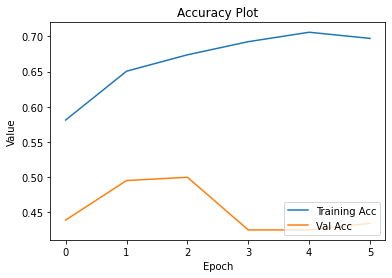

In [ ]:
# plot accuracy model

plt.plot(history_new.history['accuracy'], label='Training Acc')
plt.plot(history_new.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Plot')
plt.ylabel('Value') 
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

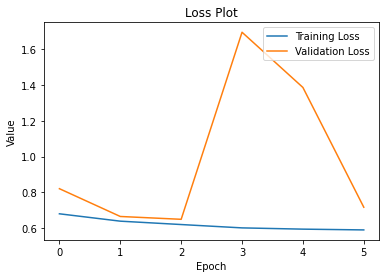

In [ ]:
#plot loss model
plt.plot(history_new.history['loss'], label='Training Loss')
plt.plot(history_new.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [ ]:
test_results = model_new.evaluate(ds_test, verbose=0)
print(f'Test Loss     : {test_results[0]:.4f}')
print(f'Test Accuracy : {test_results[1]:.4f}')

Test Loss     : 0.7274
Test Accuracy : 0.4428


In [ ]:
y_pred2 = model_new.predict(ds_test)
y_pred_final2 = []

for i in y_pred2:
  if i > 0.5:
    i = 1
    y_pred_final2.append(i)
  else:
    i = 0
    y_pred_final2.append(i)


print(classification_report(ds_test.classes, y_pred_final2))

2/2 [==============================] - 30s 10s/step
              precision    recall  f1-score   support

           0       1.00      0.03      0.05       115
           1       0.43      1.00      0.61        86

    accuracy                           0.44       201
   macro avg       0.72      0.51      0.33       201
weighted avg       0.76      0.44      0.29       201



Confusion Matrix


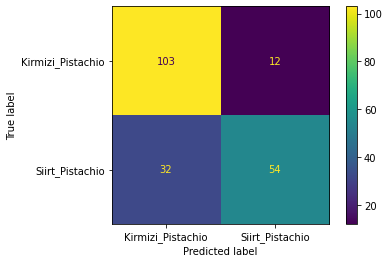

In [ ]:
#confusion matrix for test dataset
print('Confusion Matrix')
confmat2 = confusion_matrix(ds_test.classes, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=confmat2, display_labels=['Kirmizi_Pistachio', 'Siirt_Pistachio'])
disp.plot()
plt.show()

Tabel menunjukkan adanya peningkatan hasil dari Model Improvement walaupun model masih tergolong kurang baik.

Hal ini diakibatkan kurangnya uji coba saya karena limit gpu yang terbatas yaitu 12 jam dalam 1 hari.

# 9 - Model Saving

Saya melakukan saving terhadap model improvement.

In [ ]:
model_new.trainable = False

In [ ]:
model_new.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 200, 200, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 100, 100, 24  648         ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model_new.save("pistachio_m")

In [ ]:
! zip -r pistachio_m.zip pistachio_m

  adding: pistachio_m/ (stored 0%)
  adding: pistachio_m/fingerprint.pb (stored 0%)
  adding: pistachio_m/variables/ (stored 0%)
  adding: pistachio_m/variables/variables.data-00000-of-00001 (deflated 10%)
  adding: pistachio_m/variables/variables.index (deflated 79%)
  adding: pistachio_m/saved_model.pb (deflated 92%)
  adding: pistachio_m/assets/ (stored 0%)
  adding: pistachio_m/keras_metadata.pb (deflated 96%)


In [ ]:
model_new.save("pistachio_m.h5")

Karena ukuran yang terlalu besar dan tidak bisa dideploy di hugging face. Saya memutuskan menyimpan model pertama juga.

In [ ]:
model_pistachio.trainable = False

In [ ]:
model_pistachio.save("model1.h5")

# 10 - Testing

Saya melakukan dua uji coba terhadap model yaitu uji coba menggunakan data inf (gambar pistachio berlatar hitam) dan gambar pistachio yang didapatkan dari internet.

In [ ]:
ds_train.class_indices

{'Kirmizi_Pistachio': 0, 'Siirt_Pistachio': 1}

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1.h5')

Saving kirmizi.jpg to kirmizi (5).jpg


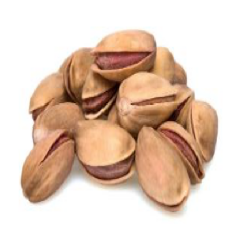

tf.Tensor([[0.9950281]], shape=(1, 1), dtype=float32)
Siirt_Pistachio


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # Prediksi dengan mengunggah gambar
  path = fn
  img = load_img(path, target_size=inputs) #harus sama dengan model kita
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  x = img_to_array(img) # untuk ubah image kedalam array
  x = np.expand_dims(x, axis=0) #Memperluas bentuk array misal 1D jadi 2D, 0 berarti baris/horizontal [[1, 2]]

  images = np.vstack([x])
  classes = model1(images) #gunakan model yang terbaik misal yg variable my_model untuk predict images
  print(classes) 
  if classes[0][0] > 0.5:
    print('Siirt_Pistachio')
  else:
    print('Kirmizi_Pistachio')

Saving siirt.jpg to siirt (1).jpg


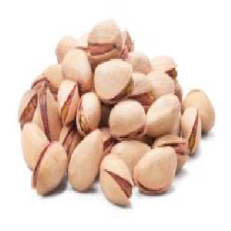

1/1 [==============================] - 3s 3s/step
[[0.08905758]]
Kirmizi_Pistachio


In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # Prediksi dengan mengunggah gambar
  path = fn
  img = load_img(path, target_size=inputs) #harus sama dengan model kita
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  x = img_to_array(img) # untuk ubah image kedalam array
  x = np.expand_dims(x, axis=0) #Memperluas bentuk array misal 1D jadi 2D, 0 berarti baris/horizontal [[1, 2]]

  images = np.vstack([x])
  classes = model1.predict(images) #gunakan model yang terbaik misal yg variable my_model untuk predict images
  print(classes) 
  if classes[0][0] > 0.5:
    print('Siirt_Pistachio')
  else:
    print('Kirmizi_Pistachio')

Hasil uji coba menunjukkan bahwa model lemah terhadap gambar pistachio yang berjumlah lebih dari 1 dan berlatar belakang lain karena input yang dimasukkan ke dalam model (train_ds) adalah gambar pistachio kirmizi dan siirt berlatar belakang hitam dengan jumlah 1 butir pistachio per gambarnya.

# 11 - Kesimpulan

Turki merupakan negara penghasil pistachio terbesar ketiga di dunia. Species pistachio yang paling menonjol di negara Turki adalah pistachio Kirmizi dan Siirt. 

Ciri fisik dari kedua pistachio:
- Kirmizi: the small and slim pistachios in brown shells. They are consumed as a snack and are major component in baklava and other sweets.
- Siirt: are round, fatter nuts with pale beige shells.

Untuk mengurangi biaya dan waktu pemilahan pistachio yang dikirim dari supplier, serta memberikan kualitas terbaik kepada konsumen, Pemerintah Turki mengadakan lomba pembuatan ai untuk mendeteksi gambar pistachio Kirmizi dan Siir (Dataset didapatkan dari kaggle.com).

Sebagai penantang, saya membuat 2 model untuk melakukan klasifikasi terhadap pistachio Kirmizi dan Siirt.

Model pertama adalah model sequential dengan pengaturan:
Pengaturan model:
1. Model menggunakan 2 convolution layer. Conv-1 menggunakan 32 filter, ukuran filter 3x3, fungsi aktivasi relu, padding sama dengan ukuran input. Kemudian conv-1 di Maxpooling dengan pool_size 2 dan strides 2.
2. Conv-2 menggunakan 64 filter, ukuran filter 3x3, fungsi aktivasi relu, padding sama dengan ukuran layer sebelumnya. Kemudian layer di Maxpooling dengan pool_size 2 dan strides 2.
3. Model kemudian di flatten menjadi array 1 d supaya bisa diproses menggunakan Neural Network.
4. Model menggunakan 1 full connected hidden layer dengan neuron 128, fungsi aktivasi relu.
5. Output berupa 1 kelas.
6. Total trainable params: 62,024,897 

Model kedua menggunakan pretrained model EfficientNetV25 dengan memotong layer output dan mengubah semua layer dari model pretrained menjadi untrainable, model diflatten, kemudian ditambahkan 3 hidden layer dengan neuron 64, 32, dan 16, dan fungsi aktivasi hidden layer relu. Model menghasilkan output 1 kelas, aktivasi sigmoid. Kemudian model dicompile menggunakan optimizer adam_v2, loss binary_crossentropy, dan metrik evaluasi accuracy.

Berdasarkan evaluasi plot, classification report, dan confusion matrix model mengalami kenaikan f1 score untuk kelas 0 dan 1. Namun masih termasuk buruk dan belum cukup stabil. Hal kemungkinan diakibatkan kurangnya uji coba saya karena limit gpu yang terbatas yaitu 12 jam dalam 1 hari. Model dapat diimprove lagi dengan penambahan epoch, pengaturan jumlah neuron, hidden layer, dan fungsi aktivasi.

Berdasarkan hasil testing dengan gambar dari dataset dan gambar yang diambil dari internet memperlihatkan model kurang kuat terhadap gambar yang menunjukkan 2 pistachio atau lebih dan gambar berlatar belakang hitam karena model hanya dilatih menggunakan dataset yang hanya memiliki 1 pistachio dalam 1 gambar dan berlatar belakang hitam. Hal ini dapat diperbaiki dengan penambahan gambar pistachio dengan latar dan jumlah yang berbeda.

# 12 - URL

https://huggingface.co/spaces/Wenny/Pistachio-Prediction2-2022